In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def load_dataset(data_path):
    dataframe = pd.read_csv('data/' + data_path, index_col=0)
    return dataframe

In [3]:
def save_csv(data, data_path):
    data.to_csv('data/' + data_path, encoding='utf-8', index=False)
    print('save: ' + data_path)

In [4]:
# 讀取 .csv 檔案
dataFileName = 'table_0502.csv'
dataSet = load_dataset(dataFileName) 
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39436913 entries, 0 to 6479548
Data columns (total 4 columns):
buildingid    int64
channelid     int64
reporttime    object
w             float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.5+ GB


In [5]:
dataSet.head(8)

,buildingid,channelid,reporttime,w
0,39,0,2018-03-01 00:00:52,1176.0
1,39,0,2018-03-01 00:01:52,1176.0
2,39,0,2018-03-01 00:02:52,1081.0
3,39,0,2018-03-01 00:03:52,1170.0
4,39,0,2018-03-01 00:04:52,1105.0
5,39,0,2018-03-01 00:05:52,1105.0
6,39,0,2018-03-01 00:10:08,1196.0
7,39,0,2018-03-01 00:11:06,720.0


In [6]:
# 先做 channelId 0
dataSetX = dataSet[dataSet.channelid == 0]
dataSetX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7814164 entries, 0 to 6359242
Data columns (total 4 columns):
buildingid    int64
channelid     int64
reporttime    object
w             float64
dtypes: float64(1), int64(2), object(1)
memory usage: 298.1+ MB


In [7]:
dataSetX.describe()

,buildingid,channelid,w
count,7.814164e+06,7814164.0,7.814164e+06
mean,2.110591e+01,0.0,4.340094e+02
std,1.496549e+01,0.0,5.213377e+02
min,1.000000e+00,0.0,-6.026000e+03
25%,7.000000e+00,0.0,1.800000e+02
50%,2.000000e+01,0.0,3.030000e+02
75%,3.300000e+01,0.0,4.900000e+02
max,5.700000e+01,0.0,1.673200e+04


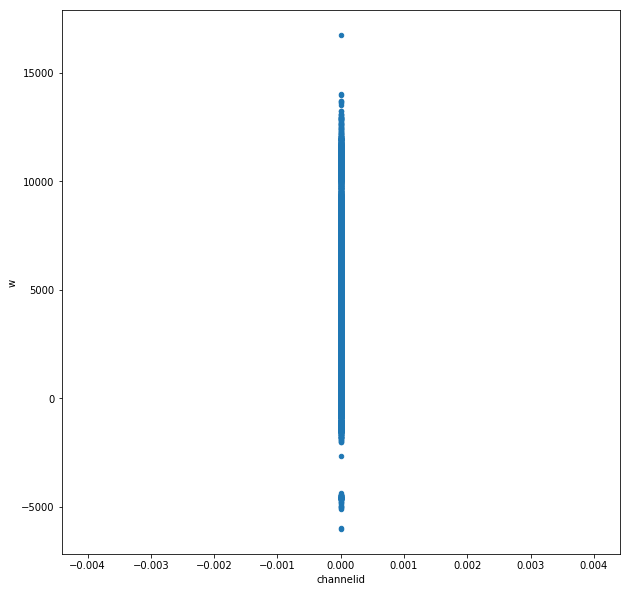

In [11]:
%matplotlib inline
dataSetX.plot(kind='scatter', x='channelid', y='w', alpha=1, figsize=(10, 10))
plt.show()

In [8]:
# 遇到 負數 直接砍，因為發現 sensor 本身有問題
# 刪除 。 15000
def delete_outliers(dataeSet):
    return dataeSet[(dataeSet['w'] >= 0) & (dataeSet['w'] < 15000)]

dataSetXX = delete_outliers(dataSetX)
dataSetXX.describe()

,buildingid,channelid,w
count,7.786789e+06,7786789.0,7.786789e+06
mean,2.108058e+01,0.0,4.359599e+02
std,1.496404e+01,0.0,5.208887e+02
min,1.000000e+00,0.0,0.000000e+00
25%,7.000000e+00,0.0,1.820000e+02
50%,2.000000e+01,0.0,3.040000e+02
75%,3.300000e+01,0.0,4.910000e+02
max,5.700000e+01,0.0,1.402200e+04


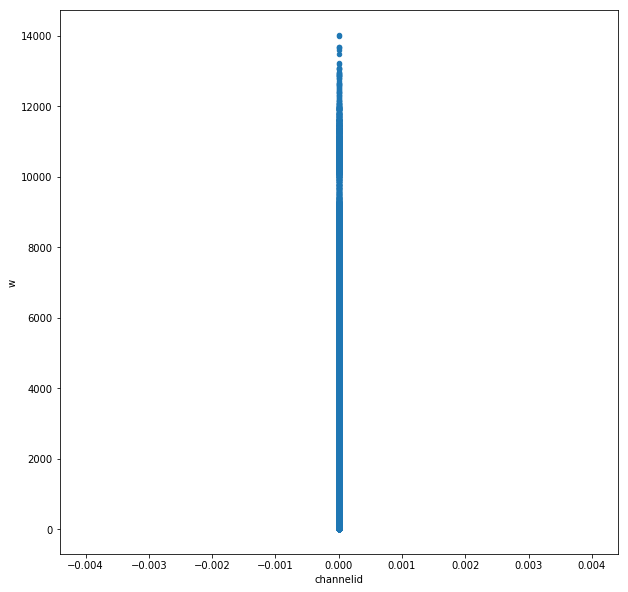

In [349]:
dataSetXX.plot(kind='scatter', x='channelid', y='w', alpha=1, figsize=(10, 10))
plt.show()

In [9]:
# string to datetime
def transform_time(DataSet):
    DataSet['reporttime'] = pd.to_datetime(DataSet['reporttime'])
    return DataSet

In [10]:
transform_dataSet = transform_time(dataSetXX)
transform_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7786789 entries, 0 to 6359242
Data columns (total 4 columns):
buildingid    int64
channelid     int64
reporttime    datetime64[ns]
w             float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 297.0 MB


D:\Users\Titan\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [12]:
save_csv(transform_dataSet, 'transform_dataSet.csv')

save: transform_dataSet.csv


In [45]:
def groupbyData(dataSet):
    group_dataSet = dataSet.groupby(['buildingid', pd.Grouper(key='reporttime', freq='15T')])['w'].mean().round(2).reset_index()
    return group_dataSet

In [46]:
group_dataSet = groupbyData(transform_dataSet)
save_csv(group_dataSet, 'group_dataSet.csv')
group_dataSet.head()

save: group_dataSet.csv


,buildingid,reporttime,w
0,1,2017-08-01 00:00:00,907.80
1,1,2017-08-01 00:15:00,701.20
2,1,2017-08-01 00:30:00,964.20
3,1,2017-08-01 00:45:00,817.75
4,1,2017-08-01 01:00:00,813.60


In [47]:
# 建立以日為單位之欄位 (96 期)
def create_peroid_column():
    columns = []
    for i in range(1, 97):
        columns.append('period_' + str(i))
    return columns

# 建立彙整資料欄位
def create_consolidation_column():
    return ['uuid', 'buildingId', 'reportTime'] + create_peroid_column()

In [48]:
columns = create_consolidation_column()
new_df = pd.DataFrame(columns=columns)
new_df

,uuid,buildingId,reportTime,period_1,period_2,period_3,period_4,period_5,period_6,period_7,...,period_87,period_88,period_89,period_90,period_91,period_92,period_93,period_94,period_95,period_96


In [49]:
# create new periods time list
periods = pd.date_range('00:00:00', periods=96, freq='15T').time
pd.DataFrame(periods).T

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00


In [50]:
tmp_index = 50
tmp_filter = group_dataSet['buildingid'] == 1
tmpGroups = group_dataSet[tmp_filter].groupby(pd.Grouper(key='reporttime',freq='1D'))
tmpGroup = tmpGroups.get_group('2017-10-07').reset_index()
print(tmpGroup['reporttime'][tmp_index].time(), periods[tmp_index])
print(tmpGroup['reporttime'][tmp_index].time() == periods[tmp_index])

tmp_index = 51
print(tmpGroup['reporttime'][tmp_index].time(), periods[tmp_index])
print(tmpGroup['reporttime'][tmp_index].time() == periods[tmp_index])

12:30:00 12:30:00
True
22:45:00 12:45:00
False


In [51]:
# 轉置用電資料
def transpose_data_electricity_watt(date_df):
    period_index = 0
    df_list = []
    if (len(date_df) == 96):
        return date_df.drop(['reporttime'], axis=1)['w'].tolist()
    else:
        for index, row in date_df.iterrows():
            # 直到找到該時段的 index
            while (row['reporttime'].time() != periods[period_index]):
                df_list.append(None)
                period_index += 1
                
#             print(period_index, row['reporttime'].time(), periods[period_index], row['reporttime'].time() == periods[period_index])
            df_list.append(row['w'])
            period_index += 1
        
        # 將最後面的 NA 值設為 None
        if (len(df_list) != 96):
            df_list.append(None)
            
            while (len(df_list) != 96):
                df_list.append(None)
                period_index += 1
    return df_list

In [52]:
# 建立一天的資料集
def set_day_dataSet(uuid, buildingId, reportTime, date_df):
#     print(" ", reportTime, len(date_df))
    data_watt_list = transpose_data_electricity_watt(date_df)
    
    # [uuid, buildingId, reportTime, period_1...]
    dataSet_list = [uuid, buildingId, reportTime] + data_watt_list
    
#     if (len(dataSet_list) != 99):
#         print(dataSet_list[2], len(dataSet_list))
    return dataSet_list

In [53]:
# 彙整與轉置單一使用者的用電資料 (96 期)
def consolidation_buildingid_dataSet(date_groups, user_groupName):
    dataSet_lists = []
    
    for date_groupName, date_group in date_groups:
        date_df = date_group.reset_index()
        date_df = date_df.drop(['index', 'buildingid'], axis=1)
        
        buildingId = user_groupName
        reportTime = date_groupName
        channelId = 0
        uuid = '{}_{}_{}'.format(buildingId, channelId, reportTime.date())
        dataSet_list = set_day_dataSet(uuid, buildingId, reportTime, date_df)
        dataSet_lists.append(dataSet_list)
    return dataSet_lists

In [54]:
# 彙整與轉置多個使用者的用電資料 (96 期)
def consolidation_all_dataSet(dataSet):
    users_group = dataSet.groupby('buildingid')
    users_dataSet_list = []
    
    for user_groupName, user_group in users_group:
        date_groups = user_group.groupby(pd.Grouper(key='reporttime', freq='1D'))
        tmp_list = consolidation_buildingid_dataSet(date_groups, user_groupName)
        users_dataSet_list += tmp_list
        print('process buildingid{}\t{}'.format(user_groupName, len(users_dataSet_list)))
    
    return users_dataSet_list

In [55]:
consolidation_dataSet_list = consolidation_all_dataSet(group_dataSet)
consolidation_dataSet = pd.DataFrame(consolidation_dataSet_list, columns=columns)
save_csv(consolidation_dataSet, 'consolidation_dataSet.csv')

process buildingid1	265
process buildingid2	538
process buildingid3	811
process buildingid4	1084
process buildingid5	1357
process buildingid6	1630
process buildingid7	1903
process buildingid8	2167
process buildingid9	2315
process buildingid10	2411
process buildingid11	2559
process buildingid12	2707
process buildingid13	2855
process buildingid14	3003
process buildingid15	3151
process buildingid16	3299
process buildingid17	3447
process buildingid18	3594
process buildingid19	3742
process buildingid20	3890
process buildingid21	4038
process buildingid22	4186
process buildingid23	4334
process buildingid24	4482
process buildingid25	4630
process buildingid26	4778
process buildingid27	4926
process buildingid28	5074
process buildingid29	5222
process buildingid30	5370
process buildingid31	5518
process buildingid32	5666
process buildingid33	5811
process buildingid34	5959
process buildingid35	6107
process buildingid36	6255
process buildingid37	6403
process buildingid38	6535
process buildingid39	659

In [322]:
# 刪除最前或最後有缺值之資料
def delete_first_or_last_missingValue(dataSet):
    tmp_dataSet = dataSet[dataSet['period_1'].notnull()]
    return tmp_dataSet[tmp_dataSet['period_96'].notnull()]

In [323]:
def process_missingValue(dataSet):
    period_sum = 96
    # 刪除缺值之門檻值
    missingValue_threshold = 2
    dataSet.dropna(thresh=(period_sum - missingValue_threshold))
    
#     tmp_dataSet = delete_first_or_last_missingValue(dataSet)
#     print(len(dataSet), len(tmp_dataSet))
    
    isnan = False
    
    peroid_column = create_peroid_column()
    
    for index, row in dataSet.iterrows():
        # 找出 nan 值之欄位名稱
        missing_periods_name = row.index[row.isnull()].tolist()
        missing_periods_sum = len(missing_periods_name)
        
        if (missing_periods_sum != 0):
            missing_periods_number = [int(period.replace('period_', '')) for period in missing_periods_name]
            print(row['uuid'])
            print(missing_periods_number)
            
            for idx in range(missing_periods_sum - 1):
                if (missing_periods_number[idx + 1] - missing_periods_number[idx] == 1):
                    print(True)
                    break
            
            print('=' * 50)
            
            
    
#     for index, row in dataSet.iterrows():
#         for peroid_idx, peroid in enumerate(peroid_column[1:-1]):
#             cuurent_peroid = row[peroid]   
#             prev_peroid = row[peroid_column[peroid_idx - 1]]
#             next_peroid = row[peroid_column[peroid_idx + 1]]
# #             print(peroid, prev_peroid, cuurent_peroid, next_peroid)
    
#             if (type(prev_peroid))
#             if ((prev_peroid.isnan()) | (next_peroid.isnan())):
#                 isnan = True
        
#         print(isnan)
#         break
        
#         print(idx, peroid)

In [324]:
# process_missingValue(consolidation_dataSet)
tmp_dataSet1 = delete_first_or_last_missingValue(consolidation_dataSet)
tmp_dataSet0 = tmp_dataSet1[tmp_dataSet1['uuid'].str.contains('40_0_2018-04-2')]
process_missingValue(tmp_dataSet0)

40_0_2018-04-20
[13]
40_0_2018-04-23
[63, 70]
40_0_2018-04-24
[37, 38, 39, 40, 41, 42, 43, 44]
True
40_0_2018-04-25
[14]
40_0_2018-04-26
[62, 63]
True
40_0_2018-04-27
[13, 14, 15, 16, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]
True


In [325]:
test_df = pd.DataFrame({'uuid': range(8),
                      'period_1': [np.nan, np.nan, 2., 4., 6., 2., 1., 3.],
                      'period_2': [3., 4., 5., np.nan, 3., np.nan, 2., 4.],
                      'period_3': [4., 2., 5., 6, 2., np.nan, 7., np.nan],
                      'period_4': [3., 2., 5., 6., np.nan, 5., 8., np.nan],
                      'period_5': [2., 2., 3., np.nan, 2., 3., 3., np.nan],
                      'period_94': [3., 4., 5., 7., 3., 8., 2., 4.],
                      'period_95': [3., 4., 5., 6., 3., 2., 2., 4.],
                      'period_96': [np.nan, 4., np.nan, 3., 3., 6., 2., 4.]})
test_df

,period_1,period_2,period_3,period_4,period_5,period_94,period_95,period_96,uuid
0,NaN,3.0,4.0,3.0,2.0,3.0,3.0,NaN,0
1,NaN,4.0,2.0,2.0,2.0,4.0,4.0,4.0,1
2,2.0,5.0,5.0,5.0,3.0,5.0,5.0,NaN,2
3,4.0,NaN,6.0,6.0,NaN,7.0,6.0,3.0,3
4,6.0,3.0,2.0,NaN,2.0,3.0,3.0,3.0,4
5,2.0,NaN,NaN,5.0,3.0,8.0,2.0,6.0,5
6,1.0,2.0,7.0,8.0,3.0,2.0,2.0,2.0,6
7,3.0,4.0,NaN,NaN,NaN,4.0,4.0,4.0,7


In [321]:
test_df[(test_df['period_1'].notnull()) | (test_df['period_96'].notnull())]

,period_1,period_2,period_3,period_4,period_5,period_94,period_95,period_96,uuid
1,NaN,4.0,2.0,2.0,2.0,4.0,4.0,4.0,1
2,2.0,5.0,5.0,5.0,3.0,5.0,5.0,NaN,2
3,4.0,NaN,6.0,6.0,NaN,7.0,6.0,3.0,3
4,6.0,3.0,2.0,NaN,2.0,3.0,3.0,3.0,4
5,2.0,NaN,NaN,5.0,3.0,8.0,2.0,6.0,5
6,1.0,2.0,7.0,8.0,3.0,2.0,2.0,2.0,6
7,3.0,4.0,NaN,NaN,NaN,4.0,4.0,4.0,7


In [319]:
aaa = test_df[test_df['period_1'].notnull()]
aaa[aaa['period_96'].notnull()]

,period_1,period_2,period_3,period_4,period_5,period_94,period_95,period_96,uuid
3,4.0,NaN,6.0,6.0,NaN,7.0,6.0,3.0,3
4,6.0,3.0,2.0,NaN,2.0,3.0,3.0,3.0,4
5,2.0,NaN,NaN,5.0,3.0,8.0,2.0,6.0,5
6,1.0,2.0,7.0,8.0,3.0,2.0,2.0,2.0,6
7,3.0,4.0,NaN,NaN,NaN,4.0,4.0,4.0,7


In [326]:
tmp_dataSet2 = delete_first_or_last_missingValue(test_df)
tmp_dataSet2
process_missingValue(tmp_dataSet2)

3.0
[2, 5]
4.0
[4]
5.0
[2, 3]
True
7.0
[3, 4, 5]
True
